# Pipeline for image size estimation

Imports

In [8]:
import os
from pathlib import Path
import cv2
import json
import matplotlib.pyplot as plt
import random
import numpy as np
from segment_anything import sam_model_registry, SamPredictor

### Step 1: Load image data from json

In [11]:
# path to json file
json_file = 'im_coords.json'

# folder containing images
image_folder = 'sample_data'

# load data
with open(json_file, 'r') as file:
    image_data = json.load(file)

Some helper functions for displaying images

In [14]:
# function to show mask
def show_mask(mask, ax):
    color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

# function to show input point
def show_point(x, y, ax):
    ax.scatter([x], [y], color='red', marker='*', s=200, edgecolor='white', linewidth=1.25)

### let's visualize labels from json

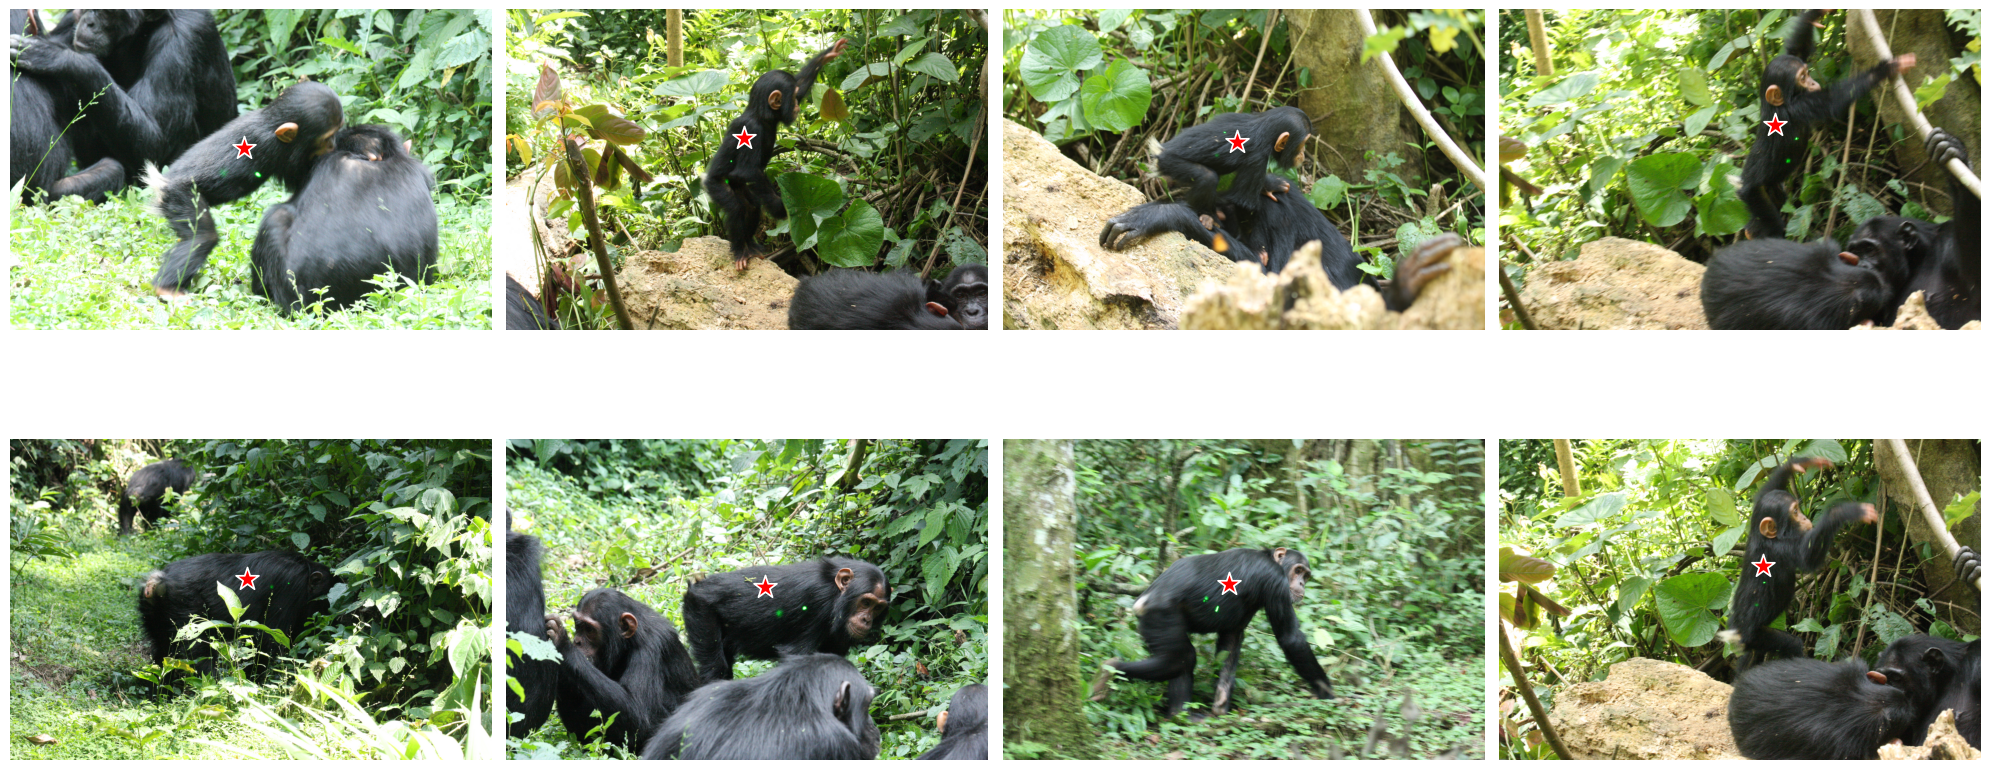

In [17]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# flatten axes for easy indexing
axs = axs.flatten()

idx = 0
# iterate through each entry in json
for image_name, coords in image_data.items():
    image_path = os.path.join(image_folder, image_name)
    # load image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for plotting

    if img is not None:
        # extract coordinates
        x, y = coords['x'], coords['y']

        # plot image
        axs[idx].imshow(img)
        show_point(x, y, axs[idx])
        axs[idx].axis('off')

        idx += 1
    else:
        print(f"Could not load image: {image_name}")

plt.tight_layout()
plt.show()

Looks good!

### Step 2: Run images through SAM to prep for laser detection

Set up SAM

In [18]:
# select checkpoint and model type
sam_checkpoint = "../sam_vit_h_4b8939.pth"
model_type = "vit_h"

# define predictor
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

Iterate through images and get mask

In [69]:
im_masks = []
n = len(images)

for i, im in enumerate(images):
    print(f"getting mask {i+1} of {n}")
    input_box = get_box(im)
    # SAM
    predictor.set_image(im)
    masks, _, _ = predictor.predict(point_coords=None, point_labels=None,
                                    box=input_box[None, :], multimask_output=False)
    
    # overlay mask on original image
    im_masks.append(masks[0])

getting mask 1 of 8
getting mask 2 of 8
getting mask 3 of 8
getting mask 4 of 8
getting mask 5 of 8
getting mask 6 of 8
getting mask 7 of 8
getting mask 8 of 8


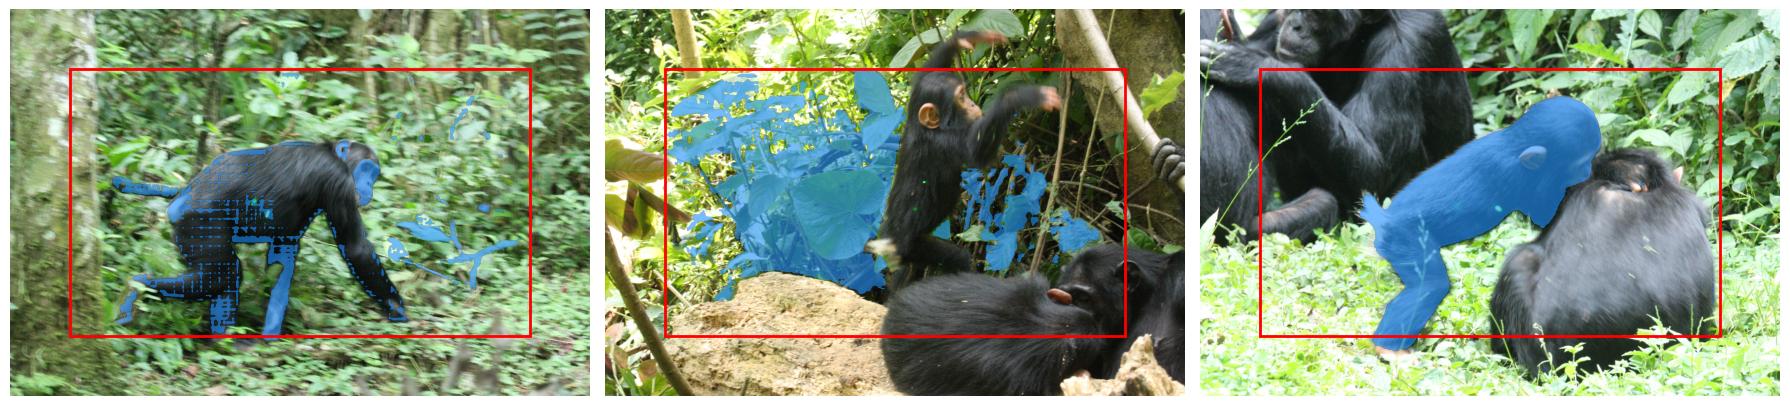

In [72]:
displayXimages(3, images, im_masks, showBox=True)